# Image Segmentation Using K-Means Clustering

## Import Libraries

In [1]:
import cv2
from kmeans import KMeansClustering
import matplotlib.pyplot as plt
import numpy as np

## Import Test Image

In [3]:
image = cv2.imread("images/cornell-hall-middle.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print("The original dimensions of Test Image 2 are:", image.shape)


### Resize image for computational efficiency
h = image.shape[0]
w = image.shape[1]
d = image.shape[2]
h_w_ratio = h / w
new_w = 1000

new_dim = (new_w, new_w*h_w_ratio)
new_dim = np.int16(new_dim)
new_dim = tuple(new_dim)

image = cv2.resize(image, new_dim)
print("The resized dimensions of Test Image 2 are:", image.shape)

image_pixels = image.reshape((-1, 3))
image_pixels = np.float32(image_pixels)
print("The reshaped dimensions of Test Image 2 are:", image_pixels.shape)

The original dimensions of Test Image 2 are: (3465, 5202, 3)
The resized dimensions of Test Image 2 are: (666, 1000, 3)
The reshaped dimensions of Test Image 2 are: (666000, 3)


## Predict Image Clusters

In [4]:
km_3 = KMeansClustering(K = 3, max_iterations = 100)
pred_3 = km_3.predict(image_pixels)

km_5 = KMeansClustering(K = 5, max_iterations = 100)
pred_5 = km_5.predict(image_pixels)

km_7 = KMeansClustering(K = 7, max_iterations = 100)
pred_7 = km_7.predict(image_pixels)

In [6]:
centers_3 = np.uint8(km_3.cent())
centers_5 = np.uint8(km_5.cent())
centers_7 = np.uint8(km_7.cent())

pred_3 = pred_3.astype(int)
pred_5 = pred_5.astype(int)
pred_7 = pred_7.astype(int)

In [7]:
labels_3 = pred_3.flatten()
labels_5 = pred_5.flatten()
labels_7 = pred_7.flatten()

out_image_3 = centers_3[labels_3.flatten()]
out_image_5 = centers_5[labels_5.flatten()]
out_image_7 = centers_7[labels_7.flatten()]

out_image_3 = out_image_3.reshape(image.shape)
out_image_5 = out_image_5.reshape(image.shape)
out_image_7 = out_image_7.reshape(image.shape)

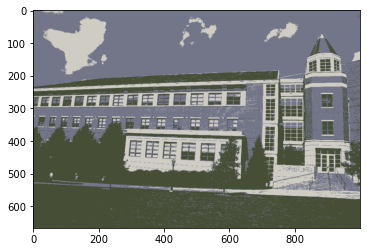

In [8]:
plt.imshow(out_image_3)

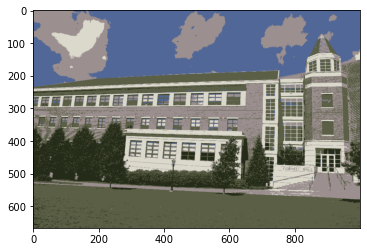

In [9]:
plt.imshow(out_image_5)

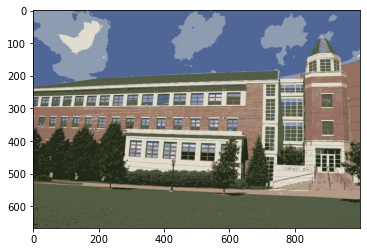

In [10]:
plt.imshow(out_image_7)